In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("bank.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Exploratory Data Analysis

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


#### Checking null values

In [6]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>0]
features_with_na

[]

We have no column having a null data which is good.

#### Separating numerical features

In [7]:
num_features = [features for features in data.columns if data[features].dtypes!='O']
num_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [8]:
for features in num_features:
    print(f"{features} have {len(data[features].unique())} unique features")

age have 67 unique features
balance have 2353 unique features
day have 31 unique features
duration have 875 unique features
campaign have 32 unique features
pdays have 292 unique features
previous have 24 unique features


#### Discrete features

In [9]:
discrete_feature=[feature for feature in num_features if len(data[feature].unique())<15]
discrete_feature

[]

In [10]:
for features in discrete_feature:
    print(f"{features} have {data[features].unique()} unique features")

#### Continuous features

In [11]:
cont_feature=[feature for feature in num_features if feature not in discrete_feature]
cont_feature

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

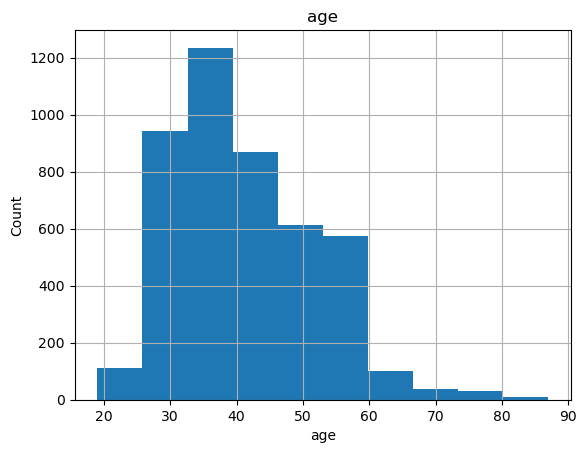

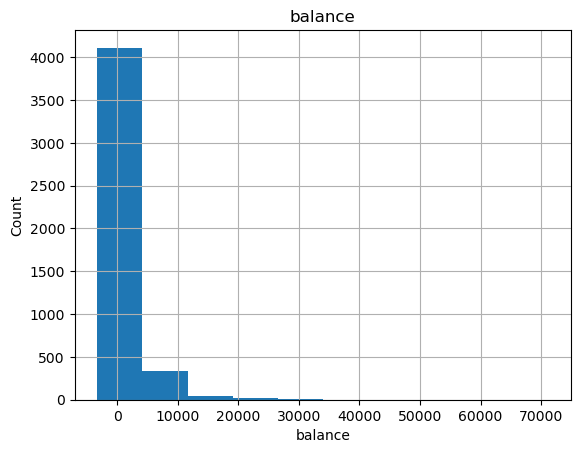

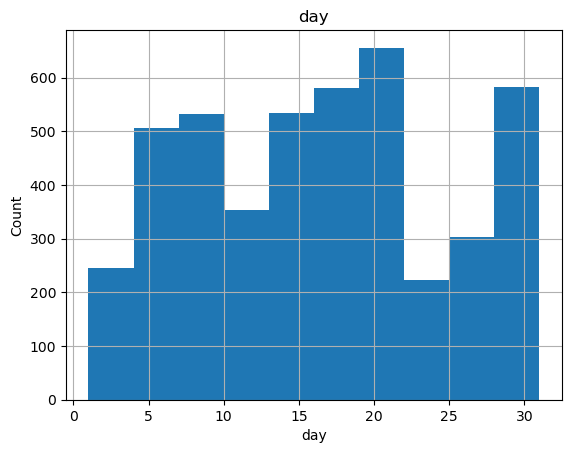

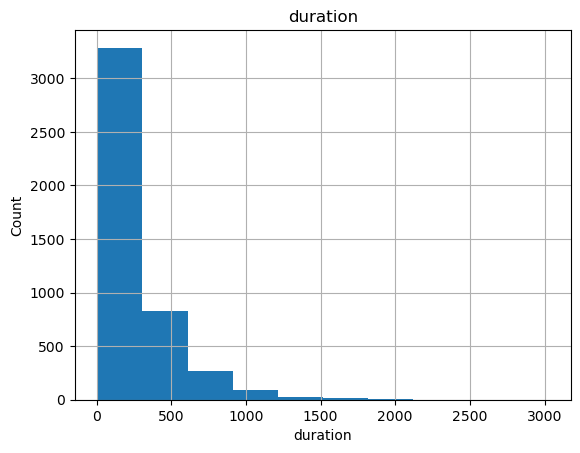

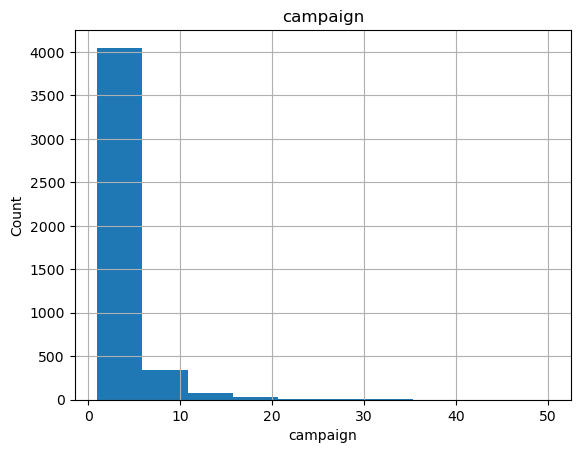

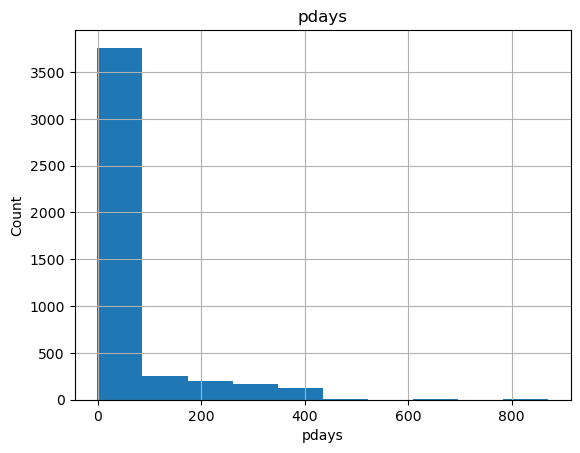

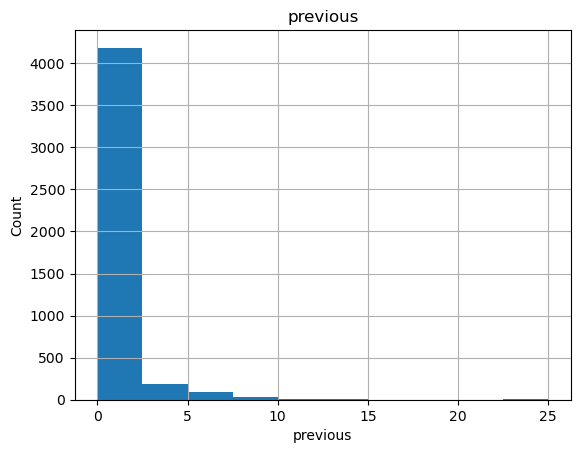

In [12]:
for feature in cont_feature:
    dataset=data.copy()
    dataset[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

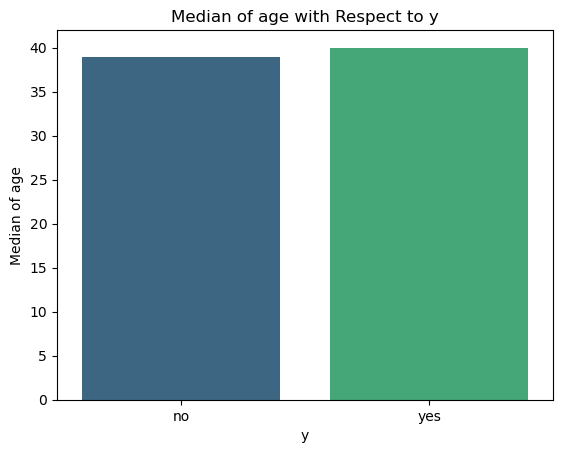

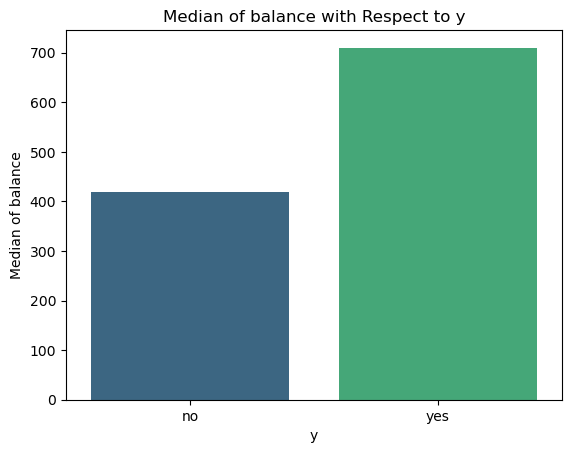

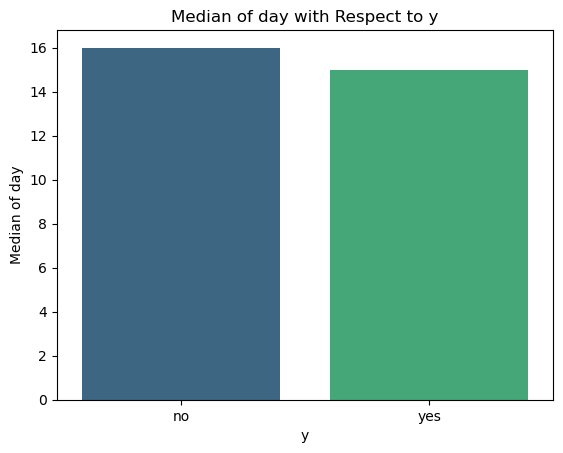

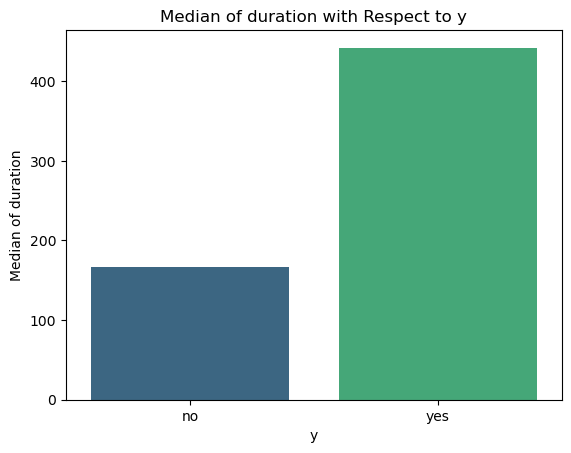

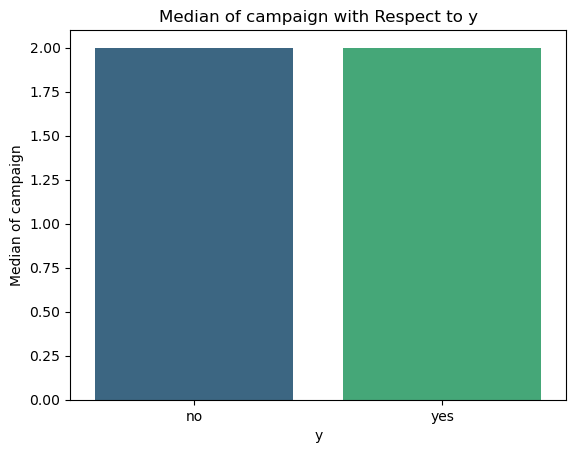

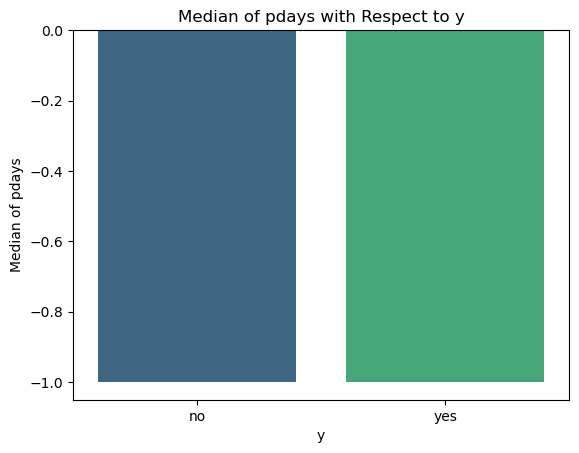

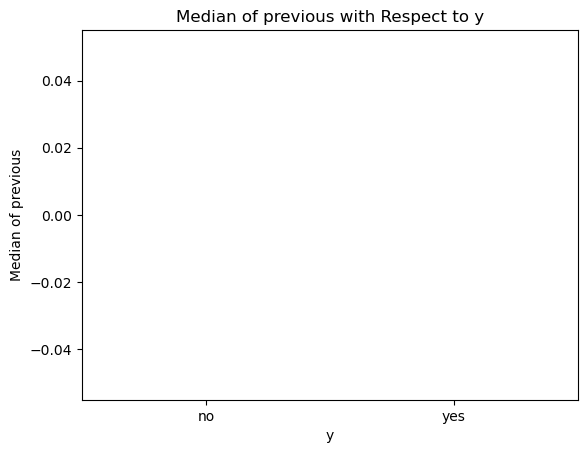

In [13]:
for feature in cont_feature:
    # Group the data by y and calculate the median of each feature
    median = data.groupby("y")[feature].median()
    sns.barplot(x=median.index, y=median.values, palette="viridis")
    plt.xlabel("y")
    plt.ylabel("Median of {}".format(feature))
    plt.title("Median of {} with Respect to y".format(feature))
    plt.show()

We can get median values which represent 

#### Separating categorical features

In [14]:
cat_features = [features for features in data.columns if data[features].dtypes=='O']
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [15]:
data['y']=np.where(data['y']=='yes',1,0)

In [16]:
for feature in cat_features:
    print(f'{feature} has {len(data[feature].unique())} features')

job has 12 features
marital has 3 features
education has 4 features
default has 2 features
housing has 2 features
loan has 2 features
contact has 3 features
month has 12 features
poutcome has 4 features
y has 2 features


We can see that 'type' is a categorical variable with 5 unique variables

### Correlation

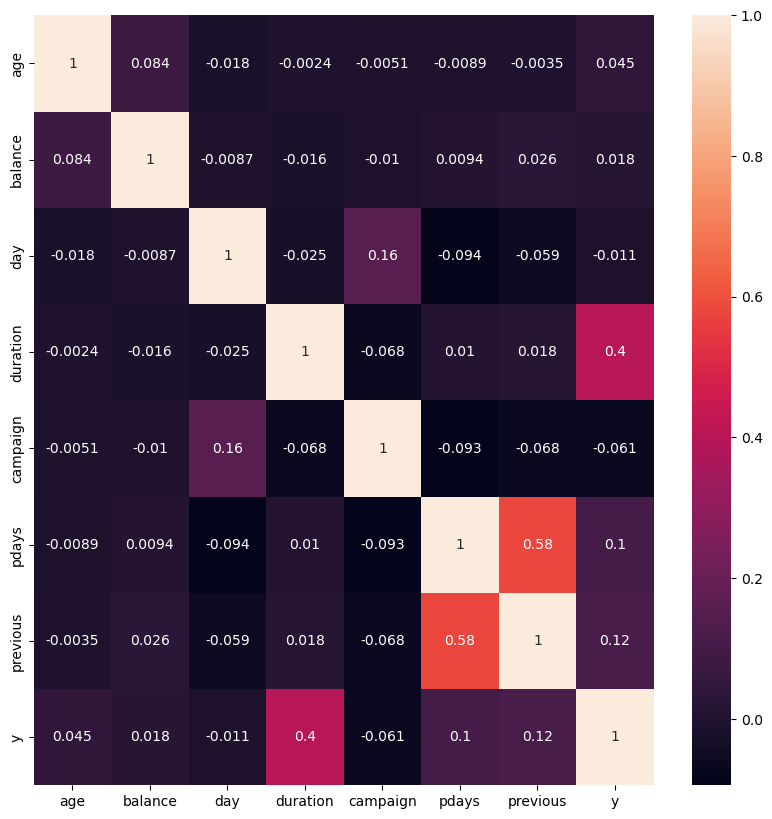

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

### One Hot Encoding

In [18]:
data = pd.get_dummies(data, columns =['job','marital','education','default','housing','loan','contact','month','poutcome'], drop_first=True)
data

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Dependent and independent feature split

In [19]:
X = data.drop(columns=["y"],axis=1)
y = data['y']

###  Balanced Dataset

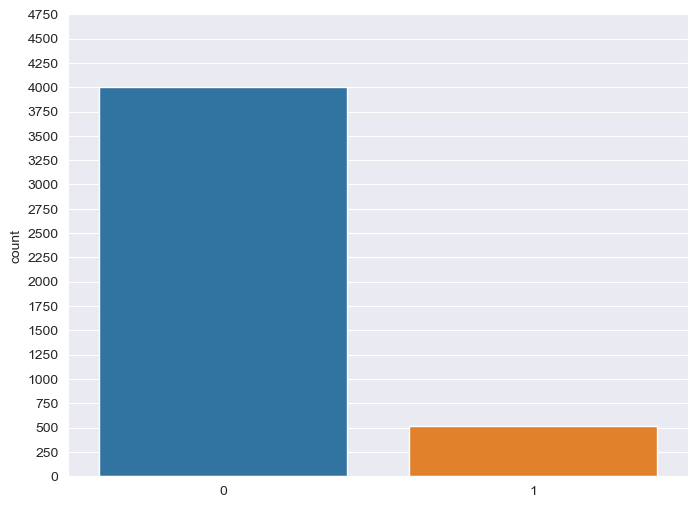

In [20]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

In [21]:
from imblearn.over_sampling import RandomOverSampler
rdm=RandomOverSampler()
X,y=rdm.fit_resample(X,y)
data=pd.concat([X,y],axis=1)  #updating the balanced form of dataset
print(data[data["y"]==0].shape)
print(data[data["y"]==1].shape)

(4000, 43)
(4000, 43)


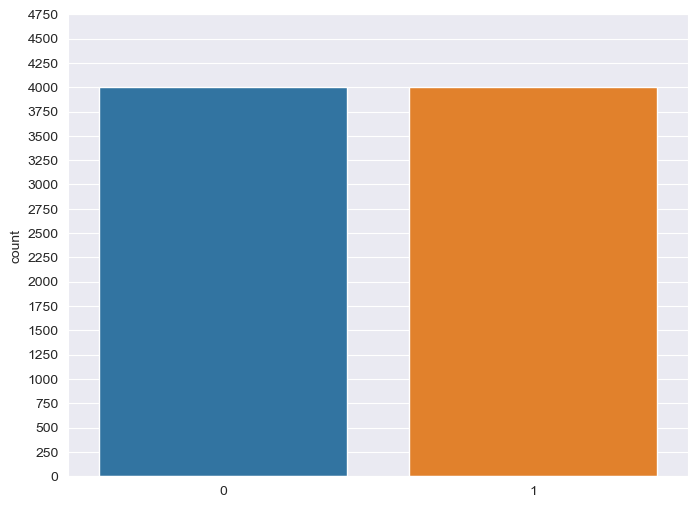

In [22]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5360, 42)
(5360,)
(2640, 42)
(2640,)


In [24]:
X_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
1194,36,1825,14,24,1,346,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7600,59,1727,25,500,4,358,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2885,26,50,12,153,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1756,32,-55,26,107,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
497,34,4943,19,117,2,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,29,2325,2,125,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5390,80,8304,9,712,1,64,12,0,0,0,...,0,1,0,0,0,0,0,0,0,0
860,58,309,19,156,2,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7603,61,997,10,106,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Feature Selection

In [25]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier

In [26]:
estimator = AdaBoostClassifier(random_state=42, n_estimators=50)
selector = SelectFromModel(estimator)
selector = selector.fit(X_train, y_train) 

In [27]:
features = np.array(X_train.columns)
print("All features: {}".format(len(X_train.columns)))
print(features) 

All features: 42
['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous'
 'job_blue-collar' 'job_entrepreneur' 'job_housemaid' 'job_management'
 'job_retired' 'job_self-employed' 'job_services' 'job_student'
 'job_technician' 'job_unemployed' 'job_unknown' 'marital_married'
 'marital_single' 'education_secondary' 'education_tertiary'
 'education_unknown' 'default_yes' 'housing_yes' 'loan_yes'
 'contact_telephone' 'contact_unknown' 'month_aug' 'month_dec' 'month_feb'
 'month_jan' 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov'
 'month_oct' 'month_sep' 'poutcome_other' 'poutcome_success'
 'poutcome_unknown']


In [28]:
status = selector.get_support()
print("Selected features:".format(len(X_train.columns)))
print(features[status])

Selected features:
['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']


In [29]:
X_train=X_train[features[status]]
X_test=X_test[features[status]]
print(X_train.columns)
print(X_test.columns)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


## Model

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score,classification_report
from sklearn.metrics import roc_curve,plot_roc_curve
from sklearn.metrics import precision_recall_fscore_support

def model_report(model):
    print(confusion_matrix(y_test,model.predict(X_test)))
    print()
    print(classification_report(y_test,model.predict(X_test)))
    print()
    print('roc_auc_score: ', roc_auc_score(y_test, model.predict(X_test)))
    print("train set accuracy score :",accuracy_score(y_train,model.predict(X_train)))
    print("test set accuracy score :",  accuracy_score(y_test,model.predict(X_test)))
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, model.predict(X_test), average='binary')
    print('precision: ', precision)
    print('recall: ', recall)
    print('f1-score: ', f1_score)
    plot_roc_curve(model,X_test,y_test)

In [31]:
def model_pred(model,y_test):
    y_pred=model.predict(X_test)
    y_pred=pd.DataFrame(y_pred,columns=['Pred'],index=None)
    y_test=np.ravel(y_test)
    y_test=pd.DataFrame(y_test,columns=['Actual'],index=None)
    print(pd.concat([y_test,y_pred], axis=1))

### Logistic Regression

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

parameter={'C':[0.0,0.5,1,1.5,2,3,5,6,7,8,8.5,9,9.5,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(model,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.5, 1, 1.5, 2, 3, 5, 6, 7, 8, 8.5, 9, 9.5,
                               10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [33]:
log_regressor.best_params_

{'C': 1.5, 'penalty': 'l2'}

In [34]:
log_regressor.best_score_

0.7417910447761195

[[1011  307]
 [ 357  965]]

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1318
           1       0.76      0.73      0.74      1322

    accuracy                           0.75      2640
   macro avg       0.75      0.75      0.75      2640
weighted avg       0.75      0.75      0.75      2640


roc_auc_score:  0.7485129672014857
train set accuracy score : 0.7408582089552239
test set accuracy score : 0.7484848484848485
precision:  0.7586477987421384
recall:  0.7299546142208775
f1-score:  0.7440246723207402
      Actual  Pred
0          0     1
1          0     1
2          0     0
3          1     1
4          0     0
...      ...   ...
2635       0     0
2636       0     0
2637       1     1
2638       1     0
2639       0     1

[2640 rows x 2 columns]


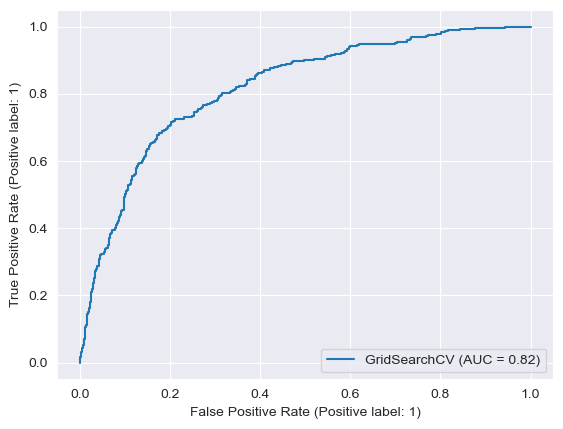

In [35]:
model_report(log_regressor)
model_pred(log_regressor,y_test)

### Random Forest

In [36]:
parameter = { 
    'n_estimators': [50,100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,10,15,20],
    'criterion' :['gini', 'entropy']
}

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

rf_model=GridSearchCV(model,parameter,scoring='accuracy',cv=5)
rf_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [38]:
rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

In [39]:
rf_model.best_score_

0.9496268656716419

[[1216  102]
 [   7 1315]]

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1318
           1       0.93      0.99      0.96      1322

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640


roc_auc_score:  0.9586575038051051
train set accuracy score : 1.0
test set accuracy score : 0.9587121212121212
precision:  0.9280169371912491
recall:  0.9947049924357034
f1-score:  0.9602044541803578
      Actual  Pred
0          0     0
1          0     0
2          0     0
3          1     1
4          0     0
...      ...   ...
2635       0     0
2636       0     0
2637       1     1
2638       1     1
2639       0     0

[2640 rows x 2 columns]


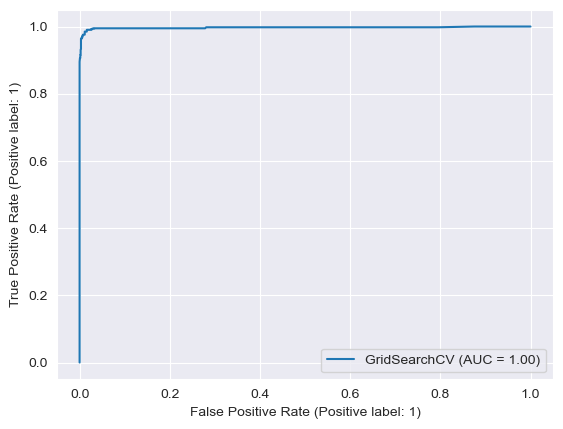

In [40]:
model_report(rf_model)
model_pred(rf_model,y_test)

### Gradient Boosting

In [41]:
parameters = {'n_estimators': [150,200,250,500],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [5,10,15]}

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)

gb_model = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
gb_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [150, 200, 250, 500]},
             scoring='accuracy')

In [43]:
gb_model.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}

In [44]:
gb_model.best_score_

0.9598880597014926

[[1241   77]
 [   7 1315]]

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1318
           1       0.94      0.99      0.97      1322

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640


roc_auc_score:  0.9681415705729352
train set accuracy score : 1.0
test set accuracy score : 0.9681818181818181
precision:  0.944683908045977
recall:  0.9947049924357034
f1-score:  0.9690493736182756
      Actual  Pred
0          0     0
1          0     0
2          0     0
3          1     1
4          0     0
...      ...   ...
2635       0     0
2636       0     0
2637       1     1
2638       1     1
2639       0     0

[2640 rows x 2 columns]


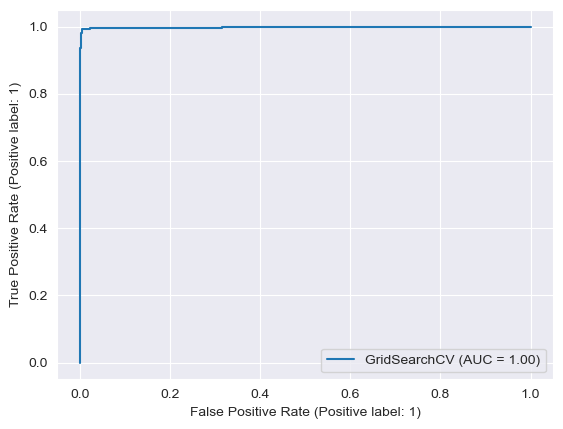

In [45]:
model_report(gb_model)
model_pred(gb_model,y_test)